In [1]:
import pandas as pd
import random
import math

# read in time point 1 for training
# train on it - model 1
# test on tp 2
# read tp 2
# add it to xgb - model 2
# test on tp 3
# read tp 3
# add it to xgb - model 3
# test on tp 4
# test model 1
data = pd.read_csv('~/ctgan/data/annualized_SD_std_avg_per_variety_99-01.csv')
data.head()

,Unnamed: 0,State,City,Date Sown,Variety,Date of Cut,Yield (tons/acre),Total Radiation (W/m^2),Total Rainfall (mm),Avg Min Temp (C),Avg Max Temp (C),Class,Avg of AAYPVPP,STD AAYPVP,Num STDs,Avg Yield of Varieties Per Cut,Annual Avg Yield,Avg Annual Yield Per Variety Per Plant
0,177,South Dakota,Highmore,5/5/1998,Frontier 2000,8/3/1999,0.71,146151.1,924.63,4.497544,17.347632,0,0.89991,0.43275,0.670340,0.806842,1.447892,1.19
1,172,South Dakota,Highmore,5/5/1998,WL 232HQ,8/3/1999,0.81,146151.1,924.63,4.497544,17.347632,1,0.89991,0.43275,0.993852,0.806842,1.447892,1.33
2,173,South Dakota,Highmore,5/5/1998,Goldrush 747,8/3/1999,0.81,146151.1,924.63,4.497544,17.347632,1,0.89991,0.43275,0.970744,0.806842,1.447892,1.32
3,174,South Dakota,Highmore,5/5/1998,TMF Multiplier II,8/3/1999,0.75,146151.1,924.63,4.497544,17.347632,1,0.89991,0.43275,0.878312,0.806842,1.447892,1.28
4,175,South Dakota,Highmore,5/5/1998,Pioneer Brand 53V63,8/3/1999,0.75,146151.1,924.63,4.497544,17.347632,1,0.89991,0.43275,0.878312,0.806842,1.447892,1.28


In [2]:
from sdv.tabular import CTGAN

model = CTGAN()
model.fit(data)

# samples_out = 7000 # total number of samples/records to generate/synthesize
# no_stds = .6 # number of standard deviations within which synthesized values must fall
# number_of_classes = (data['Class'].unique()).size # number of unique classes in input data

# data_len = len(data.index)
# F = [] # a list of the feature vectors dataframes, one per class
# for class_no in range(number_of_classes):
#     df = pd.DataFrame(data[data['Class'] == class_no])
#     F.append(df)

    
# def synthesize_tabular_data(F, samples_out, no_stds, no_classes, no_records):
#     new_F = []
#     for index, entry in enumerate(F):
#         total_rad = entry['Total Accumulated Radiation']
#         mean_rad = total_rad.mean()
#         std_rad = total_rad.std()
#         total_rain = entry['Total Accumulated Rain']
#         mean_rain = total_rain.mean()
#         std_rain = total_rain.std()
#         avg_max_temp = entry['Annual Avg Max Temp']
#         mean_max_temp = avg_max_temp.mean()
#         std_max_temp = avg_max_temp.std()
#         avg_min_temp = entry['Annual Avg Min Temp']
#         mean_min_temp = avg_min_temp.mean()
#         std_min_temp = avg_min_temp.std()
        
#         new_rads = []
#         new_rains = []
#         new_max_temps = []
#         new_min_temps = []
        
#         # calculate potcii: percentage of this class in input
#         potcii = (len(entry)/no_records)
#         no_records_to_generate = round(potcii * samples_out)
        
#         for i in range(no_records_to_generate):
#             new_rad = random.uniform(mean_rad - std_rad*no_stds, mean_rad + std_rad*no_stds)
#             new_rads.append(new_rad)
            
#             new_rain = random.uniform(mean_rain - std_rain*no_stds, mean_rain + std_rain*no_stds)
#             new_rains.append(new_rain)
        
#             new_max_temp = random.uniform(mean_max_temp - std_max_temp*no_stds, mean_max_temp + std_max_temp*no_stds)
#             new_max_temps.append(new_max_temp)
            
#             new_min_temp = random.uniform(mean_min_temp - std_min_temp*no_stds, mean_min_temp + std_min_temp*no_stds)
#             new_min_temps.append(new_min_temp)
            
#         concat_rads = pd.concat([total_rad, pd.DataFrame(new_rads)])
#         concat_rain = pd.concat([total_rain, pd.DataFrame(new_rains)])
#         concat_max_temps = pd.concat([avg_max_temp, pd.DataFrame(new_max_temps)])
#         concat_min_temps = pd.concat([avg_min_temp, pd.DataFrame(new_min_temps)])
#         new_df = pd.DataFrame()
#         new_df['Total Accumulated Radiation'] = concat_rads
#         new_df['Total Accumulated Rain'] = concat_rain
#         new_df['Annual Avg Max Temp'] = concat_max_temps
#         new_df['Annual Avg Min Temp'] = concat_min_temps
#         new_df['Class'] = index
#         print(index)
#         new_F.append(new_df)
        
#     return pd.concat(new_F)

# new_data = synthesize_tabular_data(F, samples_out, no_stds, number_of_classes, data_len)

/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/ctgan/data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/home/jmvance/miniconda3/envs/ctgan/lib/python3.9/site-packages/ctgan/data_transformer.py:112: SettingWithCopyWa

In [3]:
new_data = model.sample(3700)

In [4]:
new_data.to_csv('data/XGB_CTGAN_3700_0227_SD99-01to02_2.csv')
new_data.head()

,Unnamed: 0,State,City,Date Sown,Variety,Date of Cut,Yield (tons/acre),Total Radiation (W/m^2),Total Rainfall (mm),Avg Min Temp (C),Avg Max Temp (C),Class,Avg of AAYPVPP,STD AAYPVP,Num STDs,Avg Yield of Varieties Per Cut,Annual Avg Yield,Avg Annual Yield Per Variety Per Plant
0,94,South Dakota,Beresford,5/22/1996,Garst 620,10/1/1999,0.72,314409.97,2062.45,1.780212,16.849440,1,0.89991,0.43275,0.684724,NaN,1.447892,1.341608
1,792,South Dakota,Watertown,4/3/1999,Excalibur II,10/1/1999,1.14,347345.35,924.63,2.119366,16.549235,1,0.89991,0.43275,0.670340,0.751142,1.468765,1.644233
2,276,South Dakota,Highmore,4/3/1999,Ciba 2444,8/6/2001,0.66,246034.97,1904.25,4.401385,16.231784,1,0.89991,0.43275,1.108418,0.832079,1.447892,1.488210
3,722,South Dakota,Beresford,4/25/1997,DK124,9/25/2001,0.65,146151.10,2151.68,2.412388,14.948569,1,0.89991,0.43275,0.841734,1.111111,1.464824,1.647439
4,789,South Dakota,Beresford,5/22/1996,WL 324,8/16/1999,1.08,146151.10,1906.12,2.021175,16.791365,1,0.89991,0.43275,1.197763,0.743214,1.447892,1.559463


In [5]:
# get aggregate data
targetDataLoc = '~/ctgan/data/annualized_SD_std_avg_per_variety_2002.csv'
#aggDataLoc = 'data/synth1_GA_only_063022.csv'

#aggDf = data #pd.read_csv(aggDataLoc)
#aggDf = aggDf.drop("Unnamed: 0",axis=1)
#targetDf = pd.read_csv(targetDataLoc)
#targetDf = targetDf.drop("Unnamed: 0",axis=1)'
#aggDataLoc = 'data/synth1_GA_only_063022.csv'

aggDf = new_data #pd.read_csv(aggDataLoc)
#aggDf = aggDf.drop("Unnamed: 0",axis=1)
targetDf = pd.read_csv(targetDataLoc)
#targetDf = targetDf.drop("Unnamed: 0",axis=1)

In [6]:
############## imports
# general
import statistics
import datetime
#from sklearn.externals import joblib # save and load models
import random
# data manipulation and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## machine learning stuff
# preprocessing
from sklearn import preprocessing
# feature selection
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression
# pipeline
from sklearn.pipeline import Pipeline
# train/testing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score  
# error calculations
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# models
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.linear_model import BayesianRidge #bayesisan ridge regression
from sklearn.svm import SVC  # support vector machines classification
from sklearn.gaussian_process import GaussianProcessRegressor # import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor # k-nearest neightbors for regression
from sklearn.neural_network import MLPRegressor # neural network for regression
from sklearn.neural_network import MLPClassifier # neural network for classification
from sklearn.tree import DecisionTreeRegressor # decision tree regressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor  # random forest regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier # adaboost for classification
import xgboost as xgb
# saving models
# from sklearn.externals import joblib
import joblib

# import the API
APILoc = 'API/'

import sys
sys.path.insert(0, APILoc)

from API import *

In [7]:
# filter out the features that will not be used by the machine learning models

xColumnsToKeep = ["Total Radiation (W/m^2)","Total Rainfall (mm)", "Avg Max Temp (C)", "Avg Min Temp (C)"]

# the target to keep
yColumnsToKeep = ["Class"]

# get a dataframe containing the features and the targets
xDf = aggDf[xColumnsToKeep]
test_xDf = targetDf[xColumnsToKeep]
yDf = aggDf[yColumnsToKeep]
test_yDf = targetDf[yColumnsToKeep]

# reset the index
xDf = xDf.reset_index(drop=True)
yDf = yDf.reset_index(drop=True)
test_xDf = test_xDf.reset_index(drop=True)
test_yDf = test_yDf.reset_index(drop=True)

pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 500)

xCols = list(xDf)

In [8]:
# hide the warnings because training the neural network caues lots of warnings.
import warnings
warnings.filterwarnings('ignore')

# make the parameter grids for sklearn's gridsearchcv
rfParamGrid = {
        'model__n_estimators': [5, 10, 25, 50, 100], # Number of estimators
        'model__max_depth': [5, 10, 15, 20], # Maximum depth of the tree
        'model__criterion': ["gini"]
    }
knnParamGrid ={
        'model__n_neighbors':[2,5,10],
        'model__weights': ['uniform', 'distance'],
        'model__leaf_size': [5, 10, 30, 50]    
    }
svrParamGrid = {
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__C': [0.1, 1.0, 5.0, 10.0],
        'model__gamma': ["scale", "auto"],
        'model__degree': [2,3,4,5]
    }
nnParamGrid = {
        'model__hidden_layer_sizes':[(3), (5), (10), (3,3), (5,5), (7,7)],
        'model__solver': ['sgd', 'adam'],
        'model__learning_rate' : ['constant', 'invscaling', 'adaptive'],
        'model__learning_rate_init': [0.1, 0.01, 0.001]      
    }

linRegParamGrid = {}

bayesParamGrid={
        'model__n_iter':[100,300,500]
    }

dtParamGrid = {
    'model__criterion': ['gini'],
    'model__max_depth': [5,10,25,50,100]
    }

xgbParamGrid = {}

aModelList = [#(RandomForestClassifier(), rfParamGrid, "rfTup.pkl")]#,
              #(KNeighborsRegressor(), knnParamGrid, "knnTup.pkl"),
              #(SVC(), svrParamGrid, "svrTup.pkl")]#,
             #(MLPClassifier(), nnParamGrid, "nnTup.pkl")]#,
             #(LinearRegression(), linRegParamGrid, "linRegTup.pkl")]#,
             #(BayesianRidge(), bayesParamGrid, "bayesTup.pkl"),
             #(DecisionTreeClassifier(), dtParamGrid, "dtTup.pkl")]
             (xgb.XGBClassifier(), xgbParamGrid, "xgbTup.pkl")]

N = 10
workingDir = 'working_dir'
numFeatures = 4 # 11

model:  xgbTup
Avg MAE:  549.189
Avg R squared:  -0.3
Best MAE:  491.892
Best R squared:  -0.165
Parameters of the best model:  {}
Features selected by best model:  ['Total Radiation (W/m^2)', 'Total Rainfall (mm)', 'Avg Max Temp (C)', 'Avg Min Temp (C)']
Accuracy:  0.6945945945945946
f1 score:  0.2917260946246453
mcc:  -0.03900235981789263
 
test results on our test data: 


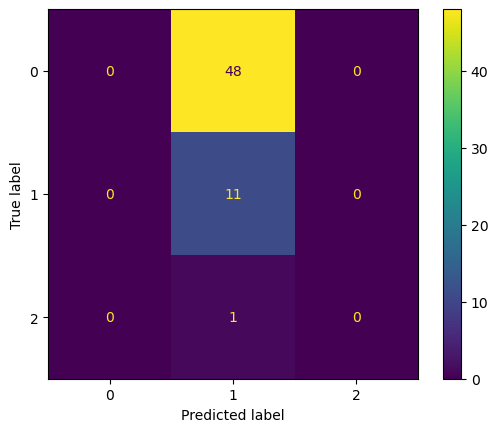

results:
accuracy score for DA/TDA:  0.6945945945945946
xgb training accuracy:  0.6945945945945946
accuracy score for PYCS:  0.18333333333333332


In [9]:
saveMLResults(test_xDf, test_yDf, N, xDf, yDf, aModelList, workingDir, numFeatures, printResults=True)

In [10]:
#bst = xgb.train(param0, dtrain2, num_round, evals=[(dtrain, "training")], xgb_model='xgbmodel')
#old_xgb = joblib.load("working_dir/xgbTup.pkl")
#print(old_xgb)
# xgb.train(xgbParamGrid, xgb.DMatrix(xDf, yDf), 20, xgb_model = best)